## ESERCIZIO 4.1

in questo esercizio abbiamo utilizzato l'algoritmo di Verlet per la dinamica molecolare. tale algoritmo calcola la nuova posizione a partire dalle due precedenti e dall'accelerazione nel seguente modo:
$$r(t+\delta t)=2r(t)-r(t-\delta t)+\delta t^2 a(t)$$

come prima cosa abbiamo fatto delle aggiunte e migliorato il codice della dinamica molecolare:

- la funzione di input già presente nel codice parte da una configurazione prestabilita e si ricava la vecchia configurazione calcolando le velocità. la configurazione di partenza è una configurazione standard che quindi non per forza corrisponde allo stato che si vuole simulare. come primo miglioramento ho quindi aggiunto una nuova funzione di input che usa le due configurazioni finali di una precedente simulazione. è quindi opportuno termalizzare prima il sistema usando la funzione di input originaria e poi far ripartire la simulazione con la nuova funzione di input. 
- un secondo miglioramento consiste nell'introduzione di una funzione che riscali le velocità in base alla temperatura. tale funzione è stata realizzata seguendo le indicazioni date dal professore nel notebook LSN_Exercises_04 

ho quindi testato queste migliorie facendo tre simulazioni diverse:
- la prima simulazione è stata fatta usando la funzione di input originaria 
- per la seconda ho usato la nuova funzione di input (che quindi usa come configurazioni iniziali quelle in uscita dalla prima simulazione, e dunque è già termalizzata)
- la terza simulazione usa sia la nuova funzione di input che il riscalamento delle velocità. prima di far partire questa simulazione ho quindi termalizzato il sistema per 5000 step, riscalando le velocità ogni 10 step. invece durante la simulazione non è stato fatto alcun riscalamento delle velocità.

per ogni simulazione ho fatto $10^4$ step, misurando ogni 10 step i valori di $T$, $Etot$, $Ekin$ ed $Epot$. ho quindi fatto un grafico con i risultati per ogni grandezza.

si osserva che:
- la prima simulazione presenta il tratto iniziale di assestamento, a differenza delle altre due che sono invece già termalizzate
- la terza simulazione si assesta sui valori di $T$ (e conseguentemente di energia) diversi rispetto alle altre due. questo è dovuto alla funzione di rescale, con cui imponiamo la temperatura al sistema


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

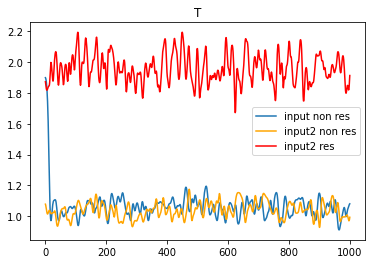

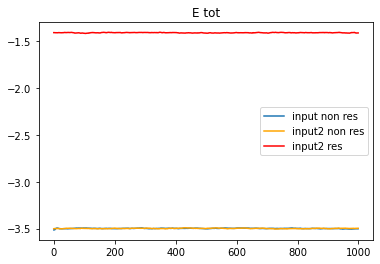

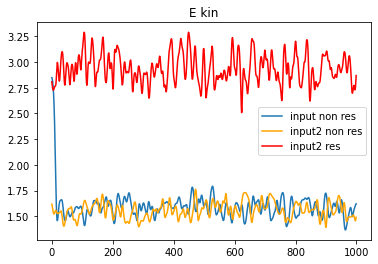

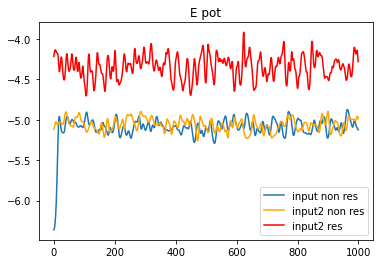

In [5]:
T=np.loadtxt("T_init")
T_nonres=np.loadtxt("T_nonrescale")
T_res=np.loadtxt("T_rescale")

E=np.loadtxt("Etot_init")
E_nonres=np.loadtxt("Etot_nonrescale")
E_res=np.loadtxt("Etot_rescale")

Ekin=np.loadtxt("Ekin_init")
Ekin_nonres=np.loadtxt("Ekin_nonrescale")
Ekin_res=np.loadtxt("Ekin_rescale")

Epot=np.loadtxt("Epot_init")
Epot_nonres=np.loadtxt("Epot_nonrescale")
Epot_res=np.loadtxt("Epot_rescale")

x=np.arange(0, len(T_res),1)

plt.plot(x,T, label="input non res")
plt.plot(x,T_nonres, color="orange", label="input2 non res")
plt.plot(x,T_res, color="red", label="input2 res")
plt.legend()
plt.title("T")
plt.show()

plt.plot(x,E, label="input non res")
plt.plot(x,E_nonres, color="orange", label="input2 non res")
plt.plot(x,E_res, color="red", label="input2 res")
plt.title("E tot")
plt.legend()
plt.show()

plt.plot(x,Ekin, label="input non res")
plt.plot(x,Ekin_nonres, color="orange", label="input2 non res")
plt.plot(x,Ekin_res, color="red", label="input2 res")
plt.title("E kin")
plt.legend()
plt.show()

plt.plot(x,Epot, label="input non res")
plt.plot(x,Epot_nonres, color="orange", label="input2 non res")
plt.plot(x,Epot_res, color="red", label="input2 res")
plt.title("E pot")
plt.legend()
plt.show()

## ESERCIZIO 4.2 

in questo esercizio abbiamo calcolato $T$, $Etot/N$, $Ekin/N$ ed $Epot/N$ con i relativi errori facendo una simulazione precedentemente termalizzata e con il riscalamento delle velocità.
la simulazione fatta è di $10^4$ step, le misurazioni di tempo ed energia sono state fatte ogni 10 step (ottenendo quindi $10^3$ valori). tali valori sono stati divisi in 100 blocchi da 10 valori ciascuno. ho poi fatto il grafico della media progressiva e del rispettivo errore.

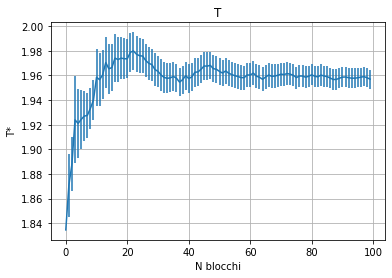

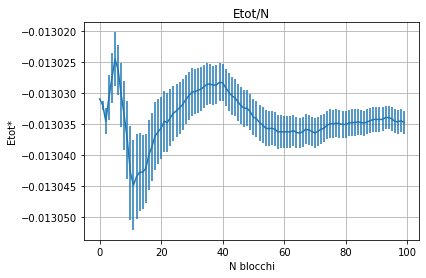

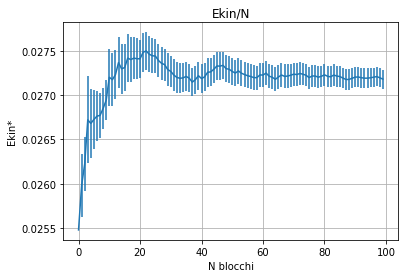

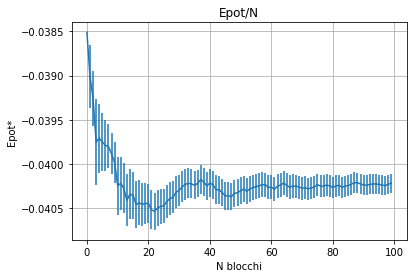

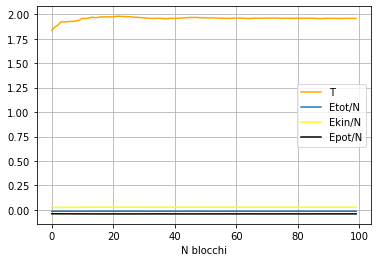

In [7]:
T=np.loadtxt("T_smooth")
T_var=np.loadtxt("T_smooth_var")

Etot=np.loadtxt("Etot_smooth")
Etot_var=np.loadtxt("Etot_smooth_var")

Ekin=np.loadtxt("Ekin_smooth")
Ekin_var=np.loadtxt("Ekin_smooth_var")

Epot=np.loadtxt("Epot_smooth")
Epot_var=np.loadtxt("Epot_smooth_var")

x=np.arange(0, len(T),1)

plt.errorbar(x,T,yerr=T_var**0.5, label="T")
plt.xlabel('N blocchi')
plt.ylabel("T*")
plt.grid(True)
#plt.legend()
plt.title("T")
plt.show()

plt.errorbar(x,Etot,yerr=Etot_var**0.5, label="Etot")
plt.xlabel('N blocchi')
plt.ylabel("Etot*")
plt.grid(True)
#plt.legend()
plt.title("Etot/N")
plt.show()

plt.errorbar(x,Ekin,yerr=Ekin_var**0.5, label="Ekin")
plt.xlabel('N blocchi')
plt.ylabel("Ekin*")
plt.grid(True)
#plt.legend()
plt.title("Ekin/N")
plt.show()

plt.errorbar(x,Epot,yerr=Epot_var**0.5, label="Epot")
plt.xlabel('N blocchi')
plt.ylabel("Epot*")
plt.grid(True)
#plt.legend()
plt.title("Epot/N")
plt.show()

plt.plot(x,T, label="T", color="orange")
plt.plot(x,Etot, label="Etot/N")
plt.plot(x,Ekin, label="Ekin/N", color="yellow")
plt.plot(x,Epot, label="Epot/N", color="black")
plt.legend()
plt.grid(True)
plt.xlabel('N blocchi')
plt.show()

